# Diabetes Risk Prediction using Machine Learning

## Project Outline

+ Problem Statement
+ Dataset Information
    + Datasource
    + Description
    + Metadata
    + Attribute Information
+ Data Preprocessing
    + Descriptive Analysis of Dataset
    + Data Cleaning and Transformation
    + Correlation Analysis of Features in Relation to Target Class
+ Machine Learning Model Development, Prediction and Evaluation
    + Logistic Regression Model
    + Decision Tree Model
        + Exploring how the Decision Tree Classifier works under the hood 
    + Random Forest Model
    + Support Vector Machine Model
+ Save the models using Joblib

## Problem Statement
* Diabetes is a very common disease with may risk factors that can lead to getting diabetes.
* We have to predict whether an individual is at risk of having early stage diabetes given the signs and symptoms.
* Since we are using an already labelled dataset to build a predictive model, our task will be a supervised machine learning problem.
* Therefore we will be using a supervised machine learning classification approach to solve our problem.

## Dataset Information
+ Datasource
    + https://archive.ics.uci.edu/dataset/529/early+stage+diabetes+risk+prediction+dataset


+ Description
    + The dataset contains the signs and symptpoms data of newly diabetic or would be diabetic patient.
    + The dataset was published in Computer Vision and Machine Intelligence in Medical Image Analysis.


+ Metadata
    + The dataset is multivariate in nature and in a CSV format.
    + It has 520 datapoints and 17 fields or attributes.


+ Attribute Information
    + Age 20-65
    + Gender 1. Male, 2.Female
    + Polyuria 1.Yes, 2.No.
    + Polydipsia 1.Yes, 2.No.
    + Sudden Weight Loss 1.Yes, 2.No.
    + Weakness 1.Yes, 2.No.
    + Polyphagia 1.Yes, 2.No.
    + Genital Thrush 1.Yes, 2.No.
    + Visual Blurring 1.Yes, 2.No.
    + Itching 1.Yes, 2.No.
    + Irritability 1.Yes, 2.No.
    + Delayed Healing 1.Yes, 2.No.
    + Partial Paresis 1.Yes, 2.No.
    + Muscle Stiffness 1.Yes, 2.No.
    + Alopecia 1.Yes, 2.No.
    + Obesity 1.Yes, 2.No.
    + Class 1.Positive, 2.Negative.

## Data Preprocessing

In [1]:
# Load EDA(Exploratory Data Analysis) Packages
import numpy as np
import pandas as pd

In [2]:
# Load Data Vizualization Packages
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# Load Machine Learning Packages
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [4]:
# Import model evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [5]:
# Check Package Versions
print("Pandas version: ", pd.__version__)
print("Numpy version: ", np.__version__)
print("Seaborn version: ", sns.__version__)
print("Sklearn version: ", sklearn.__version__)

Pandas version:  2.2.3
Numpy version:  2.1.3
Seaborn version:  0.13.2
Sklearn version:  1.6.1


In [6]:
import warnings
warnings.filterwarnings("ignore")

### Descriptive Analysis of Dataset

In [7]:
# Load the dataset
df = pd.read_csv("data/diabetes_data_upload.csv")

In [8]:
# Preview the first five rows
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [9]:
# Check the dimension of the dataset
df.shape

(520, 17)

In [10]:
# Check for column names
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [11]:
# Check column data types
df.dtypes

Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object

In [12]:
# Check how many missing values we have
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

#### Narrative

+ There are no missing values and we have 520 datapoints and 17 columns
+ Most of the columns/fields are of the Object type. We will need to convert them to a proper format

### Data Cleaning and Transformation

+ Convert the column names to a consistent case and format.
+ Encode the dataset into numeric format using either LabelEncoder or custom function
    + Gender: Female(0), Male(1)
    + Other Features: No(0), Yes(1)


In [13]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [14]:
df.columns

Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')

In [15]:
#Encode the dataset
from sklearn.preprocessing import LabelEncoder

In [16]:
objList = df.select_dtypes(include='object').columns

In [17]:
objList

Index(['gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness',
       'polyphagia', 'genital_thrush', 'visual_blurring', 'itching',
       'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')

In [18]:
columns_to_label_encode = ['polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness',
       'polyphagia', 'genital_thrush', 'visual_blurring', 'itching',
       'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity']

In [19]:
label_encoder = LabelEncoder()

In [20]:
# Encode every column except age, gender and class
for col in columns_to_label_encode:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

In [21]:
df.dtypes

age                    int64
gender                object
polyuria               int64
polydipsia             int64
sudden_weight_loss     int64
weakness               int64
polyphagia             int64
genital_thrush         int64
visual_blurring        int64
itching                int64
irritability           int64
delayed_healing        int64
partial_paresis        int64
muscle_stiffness       int64
alopecia               int64
obesity                int64
class                 object
dtype: object

In [22]:
df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,Positive
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Positive
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,Positive
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,Positive
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,Positive


In [23]:
# List Initial Classes
print(label_encoder.classes_)

['No' 'Yes']


In [24]:
# Using custom function for encoding gender and class columns
gender_map = {"Female":0, "Male":1}
target_label_map = {"Negative":0, "Positive":1}

In [25]:
df['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [26]:
df['gender'] = df['gender'].map(gender_map)

In [27]:
df['gender'].head()

0    1
1    1
2    1
3    1
4    1
Name: gender, dtype: int64

In [28]:
# For target label, get unique values
df['class'].unique()

array(['Positive', 'Negative'], dtype=object)

In [29]:
# Encode the target class using a mapping dictionary
df['class'] = df['class'].map(target_label_map)

In [30]:
# Recheck Datatypes
df.dtypes

age                   int64
gender                int64
polyuria              int64
polydipsia            int64
sudden_weight_loss    int64
weakness              int64
polyphagia            int64
genital_thrush        int64
visual_blurring       int64
itching               int64
irritability          int64
delayed_healing       int64
partial_paresis       int64
muscle_stiffness      int64
alopecia              int64
obesity               int64
class                 int64
dtype: object

In [31]:
# Recheck using Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   age                 520 non-null    int64
 1   gender              520 non-null    int64
 2   polyuria            520 non-null    int64
 3   polydipsia          520 non-null    int64
 4   sudden_weight_loss  520 non-null    int64
 5   weakness            520 non-null    int64
 6   polyphagia          520 non-null    int64
 7   genital_thrush      520 non-null    int64
 8   visual_blurring     520 non-null    int64
 9   itching             520 non-null    int64
 10  irritability        520 non-null    int64
 11  delayed_healing     520 non-null    int64
 12  partial_paresis     520 non-null    int64
 13  muscle_stiffness    520 non-null    int64
 14  alopecia            520 non-null    int64
 15  obesity             520 non-null    int64
 16  class               520 non-null    int64
dt

In [32]:
# Descriptive summary
df.describe()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000
mean,48.028846,0.630769,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,0.615385
std,12.151466,0.483061,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,0.486973
min,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
df.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


#### Narrative
+ From the descriptive summary, the minimum age is 16 and the maximum age is 90
+ We will have to get the distribution of data as per the age

In [34]:
# Value count per class
df['class'].value_counts()

class
1    320
0    200
Name: count, dtype: int64

#### Narrative
+ Our dataset has
    + 320 datapoints for class 1(Positive)
    + 200 datapoints for class 0(Negative)
+ This looks like a balanced dataset from the plot of the value counts

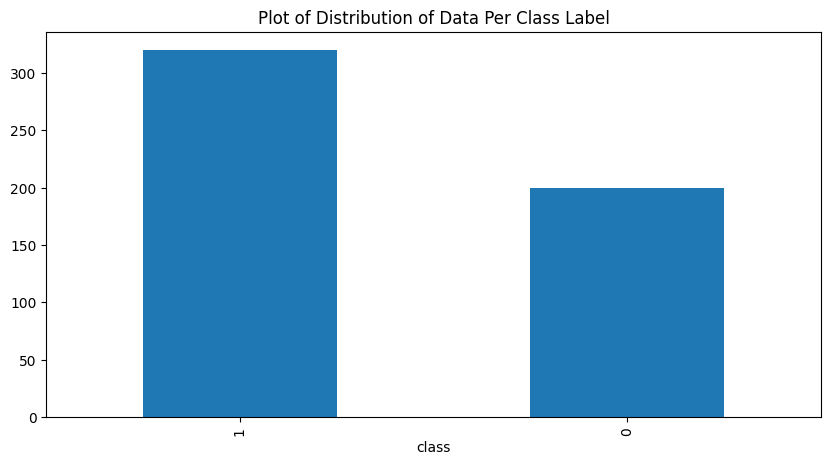

In [35]:
# Plot of distribution of data per class label
plt.figure(figsize=(10,5))
plt.title("Plot of Distribution of Data Per Class Label")
df['class'].value_counts().plot(kind='bar')
plt.show()

In [36]:
# Value count of Gender
df['gender'].value_counts()

gender
1    328
0    192
Name: count, dtype: int64

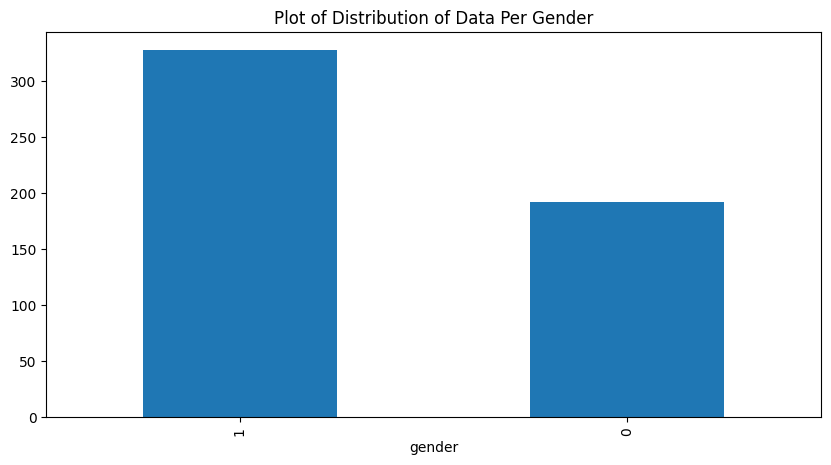

In [37]:
# Plot of Distribution of Data Per Gender
plt.figure(figsize=(10,5))
plt.title("Plot of Distribution of Data Per Gender")
df['gender'].value_counts().plot(kind='bar')
plt.show()

#### Narrative
+ Our dataset has
    + 328 datapoints for class 1(Male)
    + 192 datapoints for class 0(Female)

In [38]:
### find the minimum and maximum age
print("Maximum age: ", df['age'].max())
print("Minimum age: ", df['age'].min())

Maximum age:  90
Minimum age:  16


In [39]:
labels = ["less than 10", "10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80", "80 and more"]
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

In [40]:
freq_df = df.groupby(pd.cut(df['age'],bins=bins, labels=labels)).size()

In [41]:
freq_df.head()

age
less than 10      0
10-20             1
20-30            44
30-40           123
40-50           145
dtype: int64

In [42]:
freq_df = freq_df.reset_index(name='count')

In [43]:
freq_df.head()

,age,count
0,less than 10,0
1,10-20,1
2,20-30,44
3,30-40,123
4,40-50,145


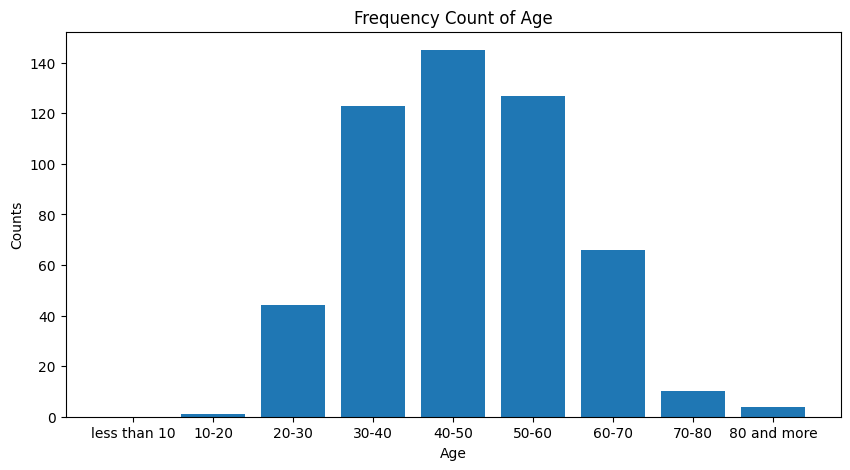

In [44]:
# Plot of distribution of data per gender (using Matplotlib)
plt.figure(figsize=(10,5)) 
plt.bar(freq_df['age'], freq_df['count'])
plt.xlabel('Age')
plt.ylabel('Counts')
plt.title('Frequency Count of Age')
plt.show()

In [45]:
freq_df.to_csv("data/frequency_distribution_age.csv")

<Axes: ylabel='age'>

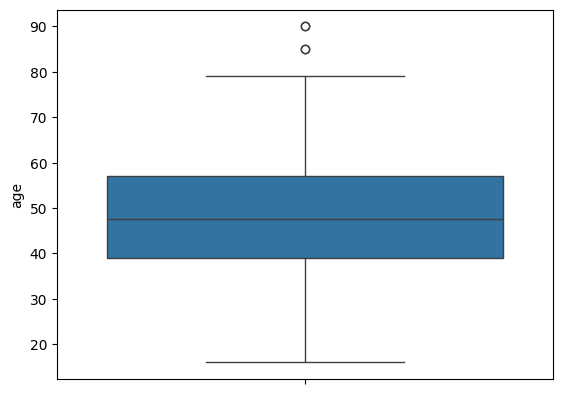

In [46]:
# Find outliers in age using Boxplot
sns.boxplot(df['age'])

### Correlation Analysis of Features in Relation to Target Class

+ We will explore the dataset to see if there is an association between the features and the target class label

In [47]:
# Using dataframe's corr() method
df.corr()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
age,1.000000,0.062872,0.199781,0.137382,0.064808,0.224596,0.315577,0.096519,0.402729,0.296559,0.201625,0.257501,0.232742,0.307703,0.321691,0.140458,0.108679
gender,0.062872,1.000000,-0.268894,-0.312262,-0.281840,-0.124490,-0.219968,0.208961,-0.208092,-0.052496,-0.013735,-0.101978,-0.332288,-0.090542,0.327871,-0.005396,-0.449233
polyuria,0.199781,-0.268894,1.000000,0.598609,0.447207,0.263000,0.373873,0.087273,0.235095,0.088289,0.237740,0.149873,0.441664,0.152938,-0.144192,0.126567,0.665922
polydipsia,0.137382,-0.312262,0.598609,1.000000,0.405965,0.332453,0.316839,0.028081,0.331250,0.128716,0.203446,0.115691,0.442249,0.180723,-0.310964,0.098691,0.648734
sudden_weight_loss,0.064808,-0.281840,0.447207,0.405965,1.000000,0.282884,0.243511,0.089858,0.068754,-0.004516,0.140340,0.088140,0.264014,0.109756,-0.202727,0.169294,0.436568
weakness,0.224596,-0.124490,0.263000,0.332453,0.282884,1.000000,0.180266,0.027780,0.301043,0.309440,0.146698,0.335507,0.272982,0.263164,0.090490,0.045665,0.243275
polyphagia,0.315577,-0.219968,0.373873,0.316839,0.243511,0.180266,1.000000,-0.063712,0.293545,0.144390,0.239466,0.263980,0.373569,0.320031,-0.053498,0.029785,0.342504
genital_thrush,0.096519,0.208961,0.087273,0.028081,0.089858,0.027780,-0.063712,1.000000,-0.148408,0.125336,0.160551,0.136111,-0.195612,-0.100188,0.204847,0.053828,0.110288
visual_blurring,0.402729,-0.208092,0.235095,0.331250,0.068754,0.301043,0.293545,-0.148408,1.000000,0.291191,0.077095,0.177767,0.364156,0.412369,0.014604,0.109005,0.251300
itching,0.296559,-0.052496,0.088289,0.128716,-0.004516,0.309440,0.144390,0.125336,0.291191,1.000000,0.114006,0.453316,0.116669,0.215575,0.266506,0.001894,-0.013384


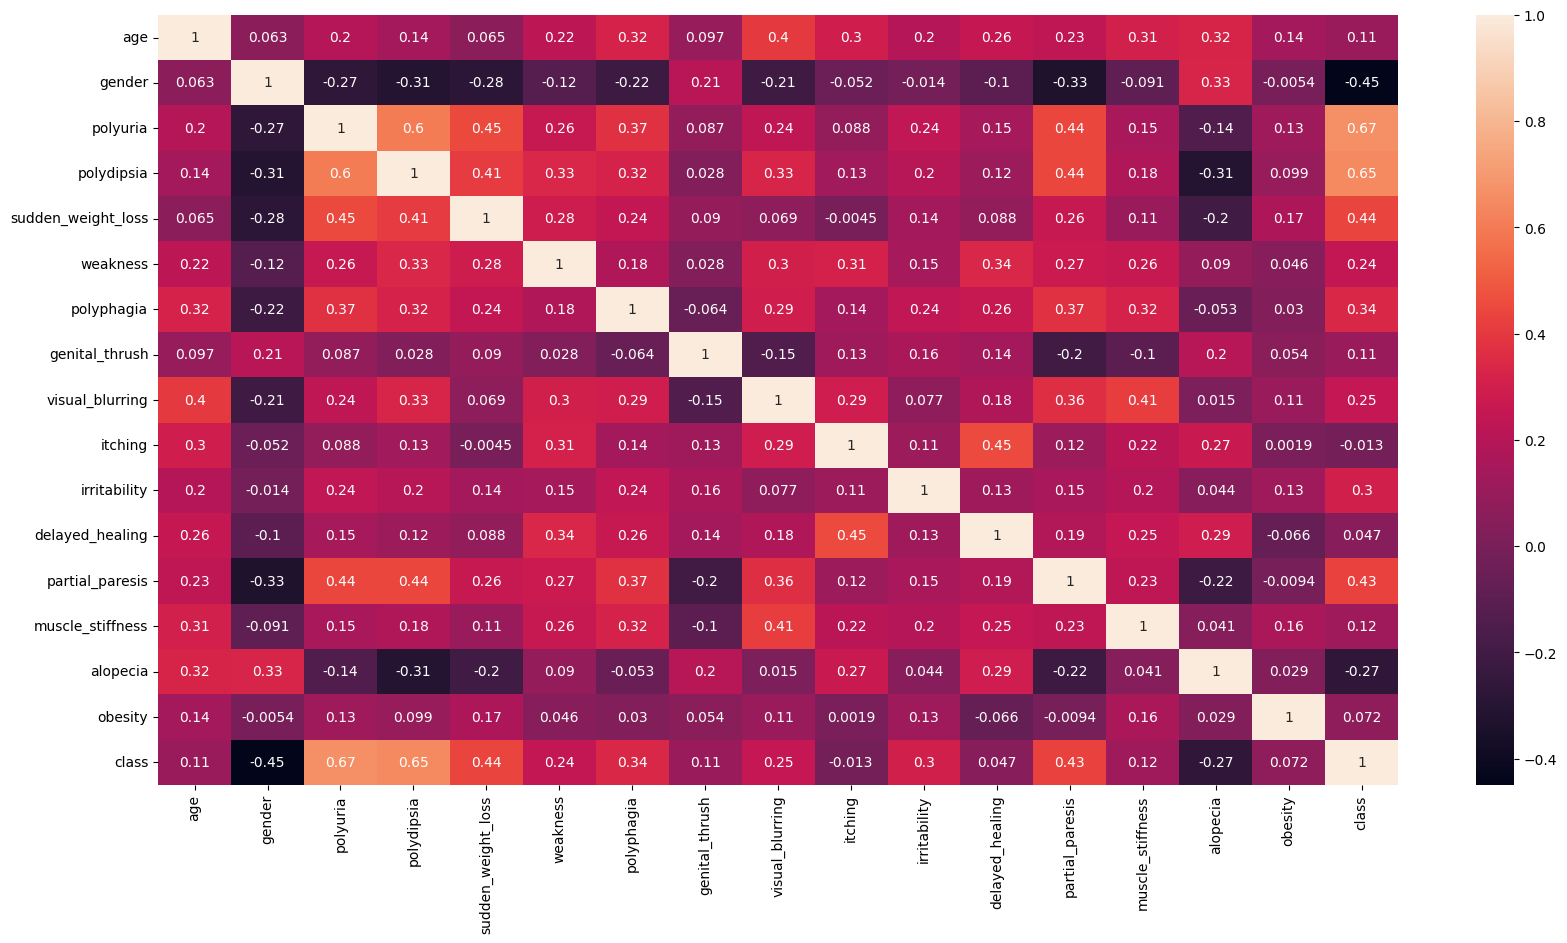

In [48]:
# Plot correlation using Seaborn's Heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [49]:
df.to_csv("data/diabetes_data_clean.csv", index=False)

## Machine Learning Model Development, Prediction and Evaluation

+ We will approach the supervised machine learning classification problem using several algorithms namely,
    + Logistic Regression
    + Decision Tree Classifier
    + Random Forest Classifier
    + Support Vector Classifier

### Logistic Regression Model

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score, KFold

In [51]:
# Features and Labels
# Which columns are for features and for labels
X = df[['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring', 'itching', 'irritability', 'delayed_healing', 'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity']]
y=df['class']

In [52]:
# Features
print(X.columns)

Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity'],
      dtype='object')


In [53]:
# Split the dataset into training and testing set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [54]:
# Using LogisticRegression estimator to build a model
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

LogisticRegression()

In [55]:
# Check model accuracy
# Method 1
print("Training set score: ", lr_model.score(x_train, y_train))
print("Test Set Score: ",lr_model.score(x_test, y_test))

Training set score:  0.9313186813186813
Test Set Score:  0.9358974358974359


In [56]:
# Hyperparameter tuning of Logistic Regression Model
from sklearn.model_selection import GridSearchCV
param_grid =  {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : [0.001, 0.01, 0.1, 1, 10, 100],
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
}

lr_grid_search = GridSearchCV(LogisticRegression(), param_grid, verbose=True, cv=5)
lr_grid_search.fit(x_train, y_train)
y_pred_lr_grid_search = lr_grid_search.predict(x_test)
print("Training set score: ", lr_grid_search.score(x_train, y_train))
print("Test Set Score: ",lr_grid_search.score(x_test, y_test))

print("Best parameters: ", lr_grid_search.best_params_)
print("Best cross validation score: {:.2f}".format(lr_grid_search.best_score_))
print("Best estimator: ", lr_grid_search.best_estimator_)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
Training set score:  0.9148351648351648
Test Set Score:  0.9294871794871795
Best parameters:  {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross validation score: 0.91
Best estimator:  LogisticRegression(C=0.1, solver='liblinear')


In [57]:
# Prediction of the Logistic Regression model on the test dataset (first 10 rows)
lr_grid_search.predict(x_test[0:10])

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0])

In [58]:
# Prediction probability of the above samples
lr_prob=lr_grid_search.predict_proba(x_test[0:10])
for i, prob in enumerate(lr_prob):
    print(f"Sample {i+1}: Class 0 Probability = {prob[0]:.3f}, Class 1 Probability = {prob[1]:.3f}")

Sample 1: Class 0 Probability = 0.540, Class 1 Probability = 0.460
Sample 2: Class 0 Probability = 0.057, Class 1 Probability = 0.943
Sample 3: Class 0 Probability = 0.088, Class 1 Probability = 0.912
Sample 4: Class 0 Probability = 0.039, Class 1 Probability = 0.961
Sample 5: Class 0 Probability = 0.422, Class 1 Probability = 0.578
Sample 6: Class 0 Probability = 0.026, Class 1 Probability = 0.974
Sample 7: Class 0 Probability = 0.384, Class 1 Probability = 0.616
Sample 8: Class 0 Probability = 0.623, Class 1 Probability = 0.377
Sample 9: Class 0 Probability = 0.484, Class 1 Probability = 0.516
Sample 10: Class 0 Probability = 0.838, Class 1 Probability = 0.162


In [59]:
from sklearn.metrics import classification_report, confusion_matrix

In [60]:
target_names = ['Negative(0)', 'Positive(1)']

In [61]:
# Classification Report (Logistic Regression Grid Search)
print(classification_report(y_test, y_pred_lr_grid_search, target_names=target_names))

              precision    recall  f1-score   support

 Negative(0)       0.88      0.93      0.90        54
 Positive(1)       0.96      0.93      0.95       102

    accuracy                           0.93       156
   macro avg       0.92      0.93      0.92       156
weighted avg       0.93      0.93      0.93       156



In [62]:
# Save the classification report to csv file
clf_report=classification_report(y_test, y_pred_lr_grid_search, target_names=target_names, output_dict=True)
report_df = pd.DataFrame(clf_report).transpose()
report_df.to_csv("model_evaluation/logistic_regression/lr_clf_report.csv")

In [63]:
# Confusion Matrix
conf_matrix=confusion_matrix(y_test, y_pred_lr_grid_search)
print(conf_matrix)

[[50  4]
 [ 7 95]]


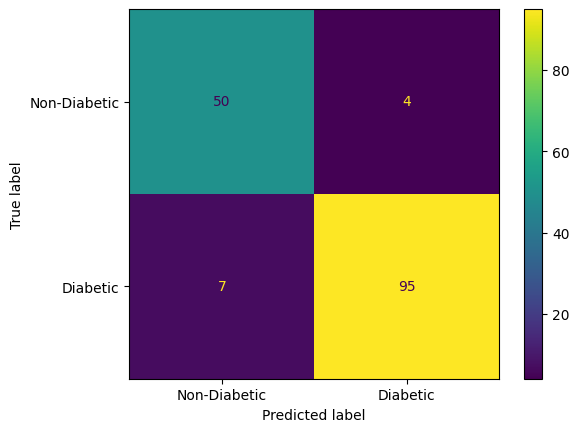

In [64]:
# Plot Confusion Matrix
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
conf_matrix_display=ConfusionMatrixDisplay(conf_matrix, display_labels = ["Non-Diabetic", "Diabetic"])
conf_matrix_display.plot()
plt.savefig('model_evaluation/logistic_regression/lr_confusion_matrix.png', dpi=100, bbox_inches='tight')
plt.show()

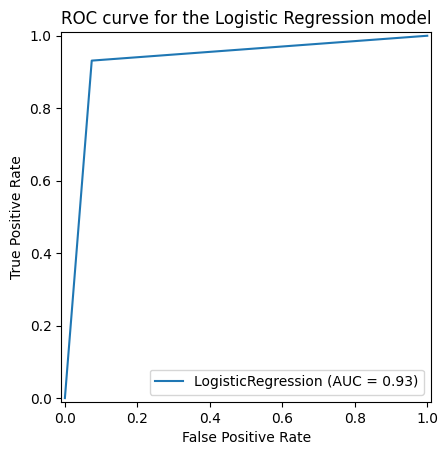

In [65]:
# Plot ROC Curve for Logistic Regression model
fpr, tpr, threshold = roc_curve(y_test, y_pred_lr_grid_search)
roc_auc = auc(fpr, tpr)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot(label='LogisticRegression (AUC = %.2f)' % roc_auc)
plt.savefig('model_evaluation/logistic_regression/lr_roc_curve.png', dpi=100, bbox_inches='tight')
plt.title("ROC curve for the Logistic Regression model")
plt.show()

In [66]:
# Cross Validation of the Logistic Regression
# Get the index of the best estimator
best_index = lr_grid_search.best_index_

# Extract scores for the best estimator
best_cv_scores = lr_grid_search.cv_results_["split0_test_score"][best_index], \
                 lr_grid_search.cv_results_["split1_test_score"][best_index], \
                 lr_grid_search.cv_results_["split2_test_score"][best_index], \
                 lr_grid_search.cv_results_["split3_test_score"][best_index], \
                 lr_grid_search.cv_results_["split4_test_score"][best_index]

best_cv_scores = [float(score) for score in best_cv_scores]
mean_test_score = lr_grid_search.cv_results_["mean_test_score"][best_index]
std_test_score = lr_grid_search.cv_results_["std_test_score"][best_index]  

print("Best Index: ", best_index)
print("Best Estimator: ", lr_grid_search.best_estimator_)
print("Cross-validation scores of the best estimator:", best_cv_scores)
print("Mean accuracy:", mean_test_score)
print("Standard deviation:", std_test_score)

Best Index:  167
Best Estimator:  LogisticRegression(C=0.1, solver='liblinear')
Cross-validation scores of the best estimator: [0.9178082191780822, 0.863013698630137, 0.9315068493150684, 0.8767123287671232, 0.9444444444444444]
Mean accuracy: 0.9066971080669711
Standard deviation: 0.031531472227607105


### Decision Tree Model

In [67]:
# Create the Decision Tree Classifier model
dt_model = DecisionTreeClassifier()


In [68]:
# Fit the model
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [69]:
print("Training set score: ", dt_model.score(x_train, y_train))
print("Test set score: ", dt_model.score(x_test, y_test))

Training set score:  1.0
Test set score:  0.9551282051282052


In [70]:
# Decision tree with depth 5
dt_model_depth5 = DecisionTreeClassifier(max_depth=5, random_state=0)
dt_model_depth5.fit(x_train, y_train)
print("Training set score: ", dt_model_depth5.score(x_train, y_train))
print("Test set score: ", dt_model_depth5.score(x_test, y_test))

Training set score:  0.9752747252747253
Test set score:  0.9551282051282052


In [71]:
# Prediction of the Decision Tree model on the test dataset (first 10 rows)
dt_model_depth5.predict(x_test[0:10])

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0])

In [72]:
# Prediction probability of the above samples
dt_prob=dt_model_depth5.predict_proba(x_test[0:10])
for i, prob in enumerate(dt_prob):
    print(f"Sample {i+1}: Class 0 Probability = {prob[0]:.3f}, Class 1 Probability = {prob[1]:.3f}")

Sample 1: Class 0 Probability = 1.000, Class 1 Probability = 0.000
Sample 2: Class 0 Probability = 0.000, Class 1 Probability = 1.000
Sample 3: Class 0 Probability = 0.000, Class 1 Probability = 1.000
Sample 4: Class 0 Probability = 0.000, Class 1 Probability = 1.000
Sample 5: Class 0 Probability = 0.000, Class 1 Probability = 1.000
Sample 6: Class 0 Probability = 0.000, Class 1 Probability = 1.000
Sample 7: Class 0 Probability = 0.000, Class 1 Probability = 1.000
Sample 8: Class 0 Probability = 0.857, Class 1 Probability = 0.143
Sample 9: Class 0 Probability = 0.000, Class 1 Probability = 1.000
Sample 10: Class 0 Probability = 0.984, Class 1 Probability = 0.016


In [73]:
# Classification report for our Decision Tree model
y_pred_dt_depth5 = dt_model_depth5.predict(x_test)
print(classification_report(y_test, y_pred_dt_depth5, target_names=target_names))

              precision    recall  f1-score   support

 Negative(0)       0.90      0.98      0.94        54
 Positive(1)       0.99      0.94      0.96       102

    accuracy                           0.96       156
   macro avg       0.94      0.96      0.95       156
weighted avg       0.96      0.96      0.96       156



In [74]:
# Save the classification report to csv file
clf_report=classification_report(y_test, y_pred_dt_depth5, target_names=target_names, output_dict=True)
report_df = pd.DataFrame(clf_report).transpose()
report_df.to_csv("model_evaluation/decision_tree/dt_clf_report.csv")

In [75]:
# Confusion Matrix
conf_matrix=confusion_matrix(y_test, y_pred_dt_depth5)
print(conf_matrix)

[[53  1]
 [ 6 96]]


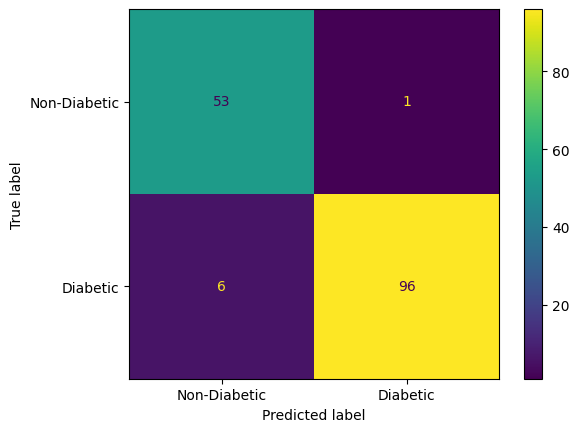

In [76]:
# Plot confusion matrix (Decision Tree model)
conf_matrix_display=ConfusionMatrixDisplay(conf_matrix, display_labels = ["Non-Diabetic", "Diabetic"])
conf_matrix_display.plot()
plt.savefig('model_evaluation/decision_tree/dt_confusion_matrix.png', dpi=100, bbox_inches='tight')
plt.show()

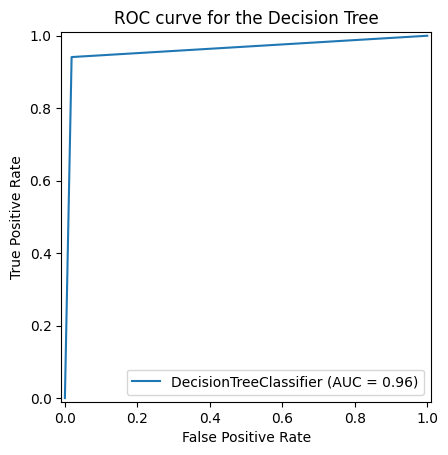

In [77]:
# Plot ROC Curve for Decision Tree Classifier model
fpr, tpr, threshold = roc_curve(y_test, y_pred_dt_depth5)
roc_auc = auc(fpr, tpr)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot(label='DecisionTreeClassifier (AUC = %.2f)' % roc_auc)
plt.savefig('model_evaluation/decision_tree/dt_roc_curve.png', dpi=100, bbox_inches='tight')
plt.title("ROC curve for the Decision Tree")
plt.show()

In [78]:
# K-Fold Cross Validation (K=5)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(dt_model_depth5, X, y, scoring='accuracy', cv=kfold)
print("Cross validation scores:\n", scores) 
print("Mean Accuracy: ", scores.mean())
print("Standard Deviation: ", scores.std())

Cross validation scores:
 [0.95192308 0.95192308 0.96153846 0.94230769 0.97115385]
Mean Accuracy:  0.9557692307692307
Standard Deviation:  0.009805806756909214


#### Exploring how the Decision Tree Classifier works under the hood

In [80]:
# Create Decision Tree Plot
from IPython.display import Image
from sklearn import tree
import pydotplus

In [81]:
feature_names = X.columns

In [82]:
# Create a Dot Plot
dot_data = tree.export_graphviz(dt_model_depth5, out_file=None, feature_names=feature_names, class_names=target_names)

In [83]:
# Draw a graph
graph = pydotplus.graph_from_dot_data(dot_data)

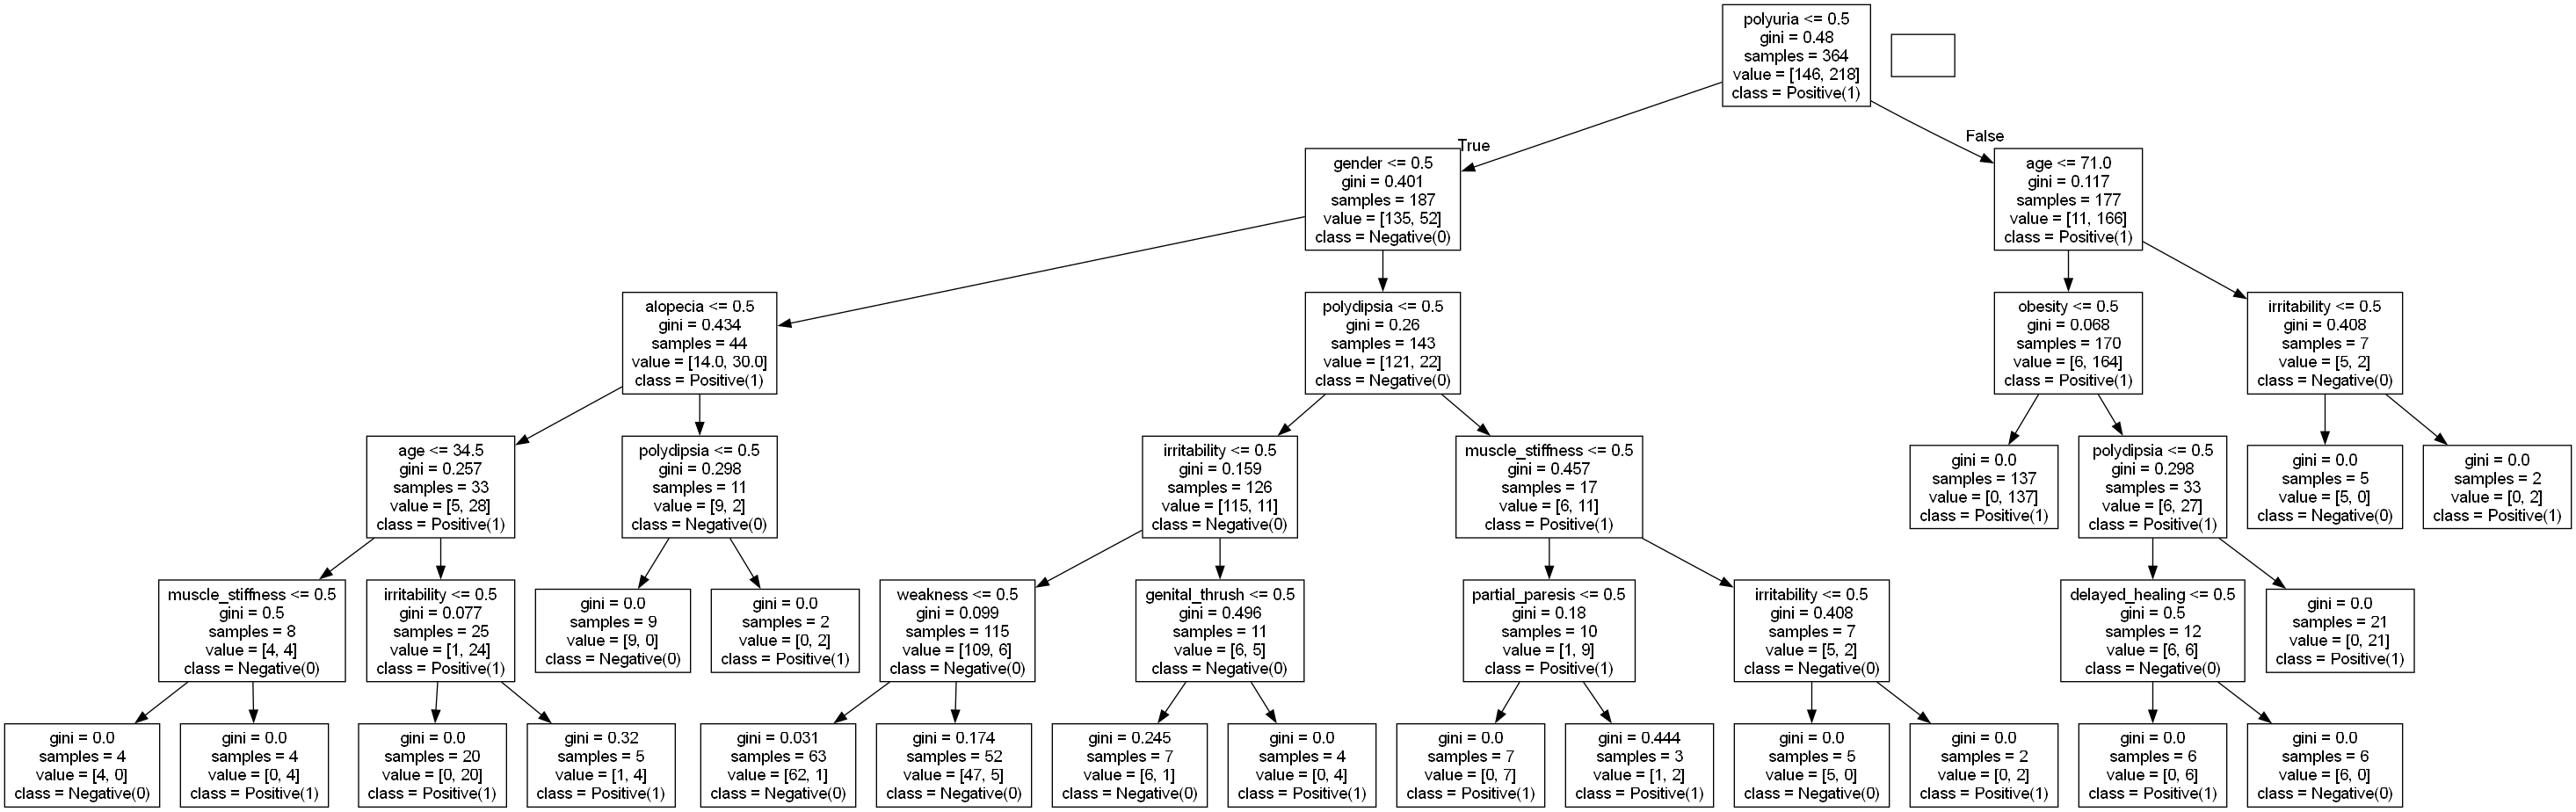

In [84]:
Image(graph.create_png())

In [85]:
# Save the plot
graph.write_png("decision_tree_diagram_for_diabetes_prediction.png")

True

### Random Forest Model

In [86]:
# Create Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=70, random_state=42)
forest.fit(x_train, y_train)

print("Training accuracy: ", forest.score(x_train, y_train))
print("Testing accuracy: ", forest.score(x_test, y_test))

Training accuracy:  1.0
Testing accuracy:  0.9935897435897436


In [87]:
# Prediction of the Random Forest model on the test dataset (first 10 rows)
forest.predict(x_test[0:10])

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0])

In [88]:
# Prediction probability of the above samples
forest_prob=forest.predict_proba(x_test[0:10])
for i, prob in enumerate(forest_prob):
    print(f"Sample {i+1}: Class 0 Probability = {prob[0]:.3f}, Class 1 Probability = {prob[1]:.3f}")

Sample 1: Class 0 Probability = 0.986, Class 1 Probability = 0.014
Sample 2: Class 0 Probability = 0.014, Class 1 Probability = 0.986
Sample 3: Class 0 Probability = 0.014, Class 1 Probability = 0.986
Sample 4: Class 0 Probability = 0.071, Class 1 Probability = 0.929
Sample 5: Class 0 Probability = 0.014, Class 1 Probability = 0.986
Sample 6: Class 0 Probability = 0.000, Class 1 Probability = 1.000
Sample 7: Class 0 Probability = 0.014, Class 1 Probability = 0.986
Sample 8: Class 0 Probability = 0.614, Class 1 Probability = 0.386
Sample 9: Class 0 Probability = 0.414, Class 1 Probability = 0.586
Sample 10: Class 0 Probability = 1.000, Class 1 Probability = 0.000


In [89]:
# Classification report for our Random Forest model
y_pred_forest = forest.predict(x_test)
print(classification_report(y_test, y_pred_forest, target_names=target_names))

              precision    recall  f1-score   support

 Negative(0)       0.98      1.00      0.99        54
 Positive(1)       1.00      0.99      1.00       102

    accuracy                           0.99       156
   macro avg       0.99      1.00      0.99       156
weighted avg       0.99      0.99      0.99       156



In [90]:
# Save the classification report to csv file
clf_report=classification_report(y_test, y_pred_forest, target_names=target_names, output_dict=True)
report_df = pd.DataFrame(clf_report).transpose()
report_df.to_csv("model_evaluation/random_forest/rf_clf_report.csv")

In [91]:
# Confusion Matrix
conf_matrix=confusion_matrix(y_test, y_pred_forest)
print(conf_matrix)

[[ 54   0]
 [  1 101]]


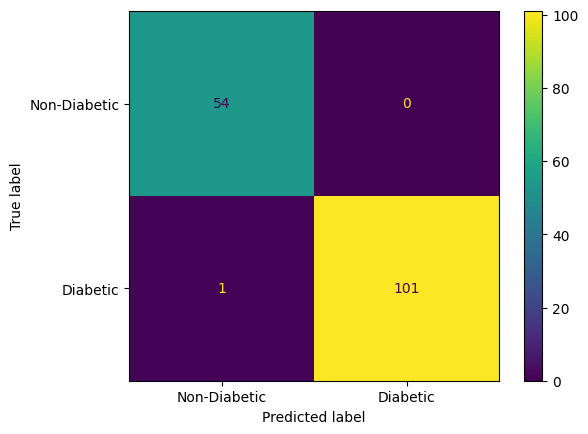

In [92]:
# Plot confusion matrix (Random Forest)
conf_matrix_display=ConfusionMatrixDisplay(conf_matrix, display_labels = ["Non-Diabetic", "Diabetic"])
conf_matrix_display.plot()
plt.savefig('model_evaluation/random_forest/rf_confusion_matrix.png', dpi=100, bbox_inches='tight')
plt.show()

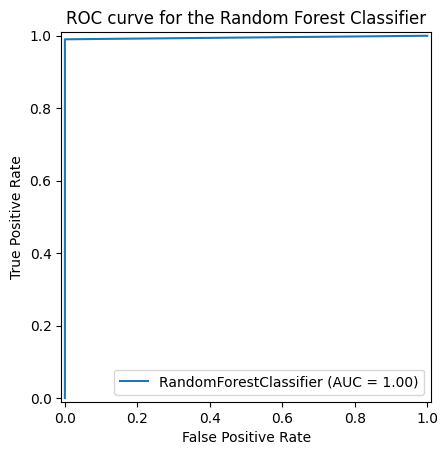

In [93]:
# Plot ROC Curve for Random Forest Classifier model
fpr, tpr, threshold = roc_curve(y_test, y_pred_forest)
roc_auc = auc(fpr, tpr)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot(label='RandomForestClassifier (AUC = %.2f)' % roc_auc)
plt.savefig('model_evaluation/random_forest/rf_roc_curve.png', dpi=100, bbox_inches='tight')
plt.title("ROC curve for the Random Forest Classifier")
plt.show()

In [94]:
# K-Fold Cross Validation (K=5)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(forest, X, y, scoring='accuracy', cv=kfold)
print("Cross validation scores:\n", scores) 
print("Mean Accuracy: ", scores.mean())
print("Standard Deviation: ", scores.std())

Cross validation scores:
 [0.99038462 0.97115385 0.97115385 0.98076923 0.99038462]
Mean Accuracy:  0.9807692307692308
Standard Deviation:  0.008600261451922287


### Support Vector Machine Model

In [95]:
# Create the optimal SVC model using hyperparameter tuning
from sklearn.svm import SVC

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10, 100]
    
}
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
svc_grid = GridSearchCV(SVC(probability=True), param_grid, cv=kfold, verbose=True)
svc_grid.fit(x_train, y_train)
y_pred_svc_grid = svc_grid.predict(x_test)

print("Training set score: ", svc_grid.score(x_train, y_train))
print("Test Set Score: ",svc_grid.score(x_test, y_test))

print("Best parameters: ", svc_grid.best_params_)
print("Best cross validation score: {:.2f}".format(svc_grid.best_score_))
print("Best estimator: ", svc_grid.best_estimator_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Training set score:  1.0
Test Set Score:  0.9743589743589743
Best parameters:  {'C': 100, 'gamma': 0.1}
Best cross validation score: 0.94
Best estimator:  SVC(C=100, gamma=0.1, probability=True)


In [96]:
# Prediction of the Support Vector Classifier model on the test dataset (first 10 rows)
svc_grid.predict(x_test[0:10])

array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0])

In [97]:
# Prediction probability of the above samples
svc_prob=svc_grid.predict_proba(x_test[0:10])
for i, prob in enumerate(svc_prob):
    print(f"Sample {i+1}: Class 0 Probability = {prob[0]:.3f}, Class 1 Probability = {prob[1]:.3f}")

Sample 1: Class 0 Probability = 0.936, Class 1 Probability = 0.064
Sample 2: Class 0 Probability = 0.004, Class 1 Probability = 0.996
Sample 3: Class 0 Probability = 0.015, Class 1 Probability = 0.985
Sample 4: Class 0 Probability = 0.017, Class 1 Probability = 0.983
Sample 5: Class 0 Probability = 0.017, Class 1 Probability = 0.983
Sample 6: Class 0 Probability = 0.005, Class 1 Probability = 0.995
Sample 7: Class 0 Probability = 0.021, Class 1 Probability = 0.979
Sample 8: Class 0 Probability = 0.586, Class 1 Probability = 0.414
Sample 9: Class 0 Probability = 0.103, Class 1 Probability = 0.897
Sample 10: Class 0 Probability = 0.936, Class 1 Probability = 0.064


In [98]:
# Classification report for our Support Vector Classifier model
y_pred_svc_grid = svc_grid.predict(x_test)
print(classification_report(y_test, y_pred_svc_grid, target_names=target_names))

              precision    recall  f1-score   support

 Negative(0)       0.96      0.96      0.96        54
 Positive(1)       0.98      0.98      0.98       102

    accuracy                           0.97       156
   macro avg       0.97      0.97      0.97       156
weighted avg       0.97      0.97      0.97       156



In [99]:
# Save the classification report to csv file
clf_report=classification_report(y_test, y_pred_svc_grid, target_names=target_names, output_dict=True)
report_df = pd.DataFrame(clf_report).transpose()
report_df.to_csv("model_evaluation/support_vector_classifier/svc_clf_report.csv")

In [100]:
# Confusion Matrix
conf_matrix=confusion_matrix(y_test, y_pred_svc_grid)
print(conf_matrix)

[[ 52   2]
 [  2 100]]


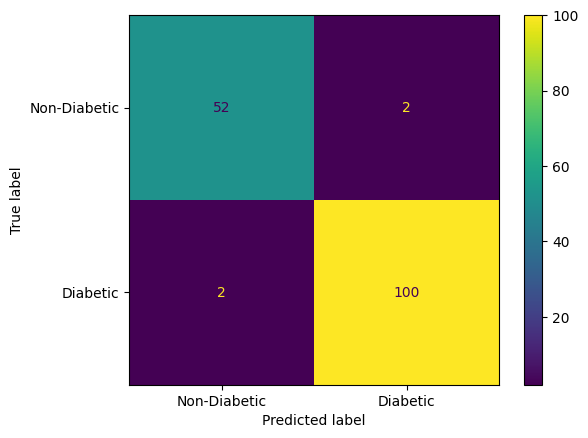

In [101]:
# Plot confusion matrix for Support Vector Classifier model
conf_matrix_display=ConfusionMatrixDisplay(conf_matrix, display_labels = ["Non-Diabetic", "Diabetic"])
conf_matrix_display.plot()
plt.savefig('model_evaluation/support_vector_classifier/svc_confusion_matrix.png', dpi=100, bbox_inches='tight')
plt.show()

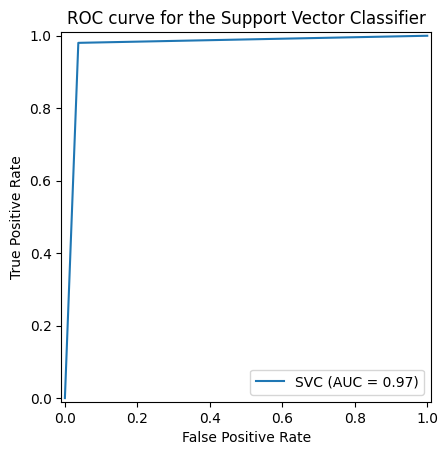

In [102]:
# Plot ROC Curve for Support Vector Classifier model
fpr, tpr, threshold = roc_curve(y_test, y_pred_svc_grid)
roc_auc = auc(fpr, tpr)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot(label='SVC (AUC = %.2f)' % roc_auc)
plt.savefig('model_evaluation/support_vector_classifier/svc_roc_curve.png', dpi=100, bbox_inches='tight')
plt.title("ROC curve for the Support Vector Classifier")
plt.show()

In [103]:
# Cross Validation values of Support Vector Classifier model
# Get the index of the best estimator
best_index = svc_grid.best_index_

# Extract scores for the best estimator
best_cv_scores = svc_grid.cv_results_["split0_test_score"][best_index], \
                 svc_grid.cv_results_["split1_test_score"][best_index], \
                 svc_grid.cv_results_["split2_test_score"][best_index], \
                 svc_grid.cv_results_["split3_test_score"][best_index], \
                 svc_grid.cv_results_["split4_test_score"][best_index]

best_cv_scores = [float(score) for score in best_cv_scores]
mean_test_score = svc_grid.cv_results_["mean_test_score"][best_index]
std_test_score = svc_grid.cv_results_["std_test_score"][best_index]  

print("Best Index: ", best_index)
print("Best Estimator: ", svc_grid.best_estimator_)
print("Cross-validation scores of the best estimator:", best_cv_scores)
print("Mean accuracy:", mean_test_score)
print("Standard deviation:", std_test_score)

Best Index:  32
Best Estimator:  SVC(C=100, gamma=0.1, probability=True)
Cross-validation scores of the best estimator: [0.9452054794520548, 0.9041095890410958, 0.958904109589041, 0.9041095890410958, 1.0]
Mean accuracy: 0.9424657534246574
Standard deviation: 0.036139468378829934


In [104]:
# Compare models using F1 score
from sklearn.metrics import f1_score
f1_score_lr_model = f1_score(y_test, y_pred_lr_grid_search)
f1_score_dt_model = f1_score(y_test, y_pred_dt_depth5)
f1_score_random_forest_model = f1_score(y_test, y_pred_forest)
f1_score_svc_model = f1_score(y_test, y_pred_svc_grid)

In [105]:
print("F1 Score for Logistic Regression Model: ", f1_score_lr_model)
print("F1 Score for Decision Tree Model: ", f1_score_dt_model)
print("F1 Score for Random Forest Model: ", f1_score_random_forest_model)
print("F1 Score for Support Vector Classifier Model: ", f1_score_svc_model)

F1 Score for Logistic Regression Model:  0.945273631840796
F1 Score for Decision Tree Model:  0.964824120603015
F1 Score for Random Forest Model:  0.9950738916256158
F1 Score for Support Vector Classifier Model:  0.9803921568627451


#### Narrative
+ The Random Forest Classifier model has the highest F1 Score

### Save the models using Joblib

In [106]:
import joblib

In [118]:
# Save the Logistic Regression model
lr_grid_model_file = open("models/logistic_regression_model_grid_search_new.pkl", "wb")
joblib.dump(lr_grid_search, lr_grid_model_file)
lr_grid_model_file.close()

In [119]:
# Save the Decision Tree model
dt_model_file = open("models/decision_tree_model_depth_5.pkl", "wb")
joblib.dump(dt_model_depth5, dt_model_file)
dt_model_file.close()

In [120]:
# Save the Random Forest model
forest_model_file = open("models/random_forest_model.pkl", "wb")
joblib.dump(forest, forest_model_file)
forest_model_file.close()

In [121]:
# Save the Support Vector Classifier model
svc_grid_model_file = open("models/svc_grid_model_final.pkl", "wb")
joblib.dump(svc_grid, svc_grid_model_file)
svc_grid_model_file.close()